# Project 1: Regression and Shrinkage

# Part 1

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

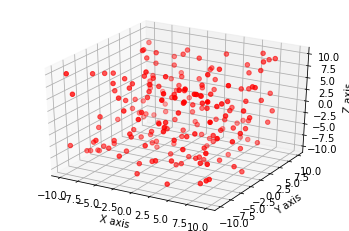

In [3]:
# generating x_i
x1 = np.random.uniform(low=-10,high=10,size=200)
x2 = np.random.uniform(low=-10,high=10,size=200)
x3 = np.random.uniform(low=-10,high=10,size=200)
x = np.array([x1,x2,x3])
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x[0],x[1],x[2],c='r')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [64]:
# shuffle the data for picking up training and testing data
# this X.T is 200 rows and 3 columns
np.random.shuffle(x.T)
# setting up other parameters
w = np.array([-0.8, 2.1, 1.5])[None]
b = 10
# loc=>mean scale=>standard diviation
eps = np.random.normal(loc=0, scale=np.sqrt(10) ,size=200)
# adding noise
y = np.dot(w,x)+b+eps

# splitting data into two parts
x_train = x.T[0:100] # its shape is (100,3)
x_test  = x.T[100:200]
# spliting y
y_train = y.T[0:100] # its shape is (100,1)
y_test  = y.T[100:200]

# Part 2

In [119]:
from sklearn import preprocessing
# standardizing test and training data
x_train = preprocessing.scale(x_train)
y_train = preprocessing.scale(y_train)
x_test = preprocessing.scale(x_test)
y_test = preprocessing.scale(y_test)
x_train.shape, y_train.shape, len(x_train.T)

((100, 3), (100, 1), 3)

In [180]:
# setting up the lambda test array
lambda_array = np.arange(0,10,0.1)

def rigid_regression(x_train, y_train, _lambda):
    ones    = np.ones(len(x_train))[None].T
    x_train = np.column_stack((ones, x_train))
    
    lambda_identity = _lambda*np.identity(len(x_train.T))
    the_inverse     = np.linalg.inv(np.dot(x_train.T,x_train) + lambda_identity)
    w_hat           = np.dot(np.dot(the_inverse, x_train.T),y_train)
    
    return w_hat

In [195]:
# Apply Rigid Regression
w_hat = []
for i in lambda_array:
    w_temp = rigid_regression(x_train,y_train,i)[None]
    w_hat = np.append(w_hat, w_temp.T)

w_hat = w_hat.reshape(100,4) # reshaping
# print(w_hat.shape)           
b_hat = w_hat[:,0]
w_hat = np.delete(w_hat,0,1).T
w_hat.shape, x_test.shape

((3, 100), (100, 3))

In [218]:
# Calculate SSE
# y_hat = np.empty((100,100))
# for i in range(100):
#     y_hat[i] = np.dot(w_hat.T[i], x_test.T) + b_hat
y_hat = np.dot(w_hat.T, x_test.T) + b_hat
y_hat.shape,np.dot(w_hat.T, x_test.T).shape

((100,), (100, 100))

In [223]:
w_hat[:,1]

array([-0.24888439,  0.74718305,  0.48052995])